### 样本不平衡对结果的影响

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification

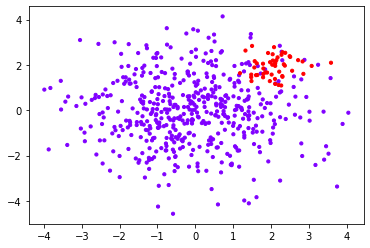

In [3]:
class_1 = 500
class_2 = 50
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[class_1, class_2]
                  ,centers=centers
                  ,cluster_std = clusters_std
                  ,random_state=0
                  ,shuffle=False
                 )
plt.scatter(X[:, 0],X[:,1],c=y,cmap="rainbow",s=10)

In [4]:
# 分别建模
# 不设定class_weight
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)
# 设定class_weight
wclf = svm.SVC(kernel="linear", class_weight={1:10})
wclf.fit(X, y)
clf.score(X,y)

0.9418181818181818

In [5]:
wclf.score(X,y)

0.9127272727272727

#### 绘制决策边界

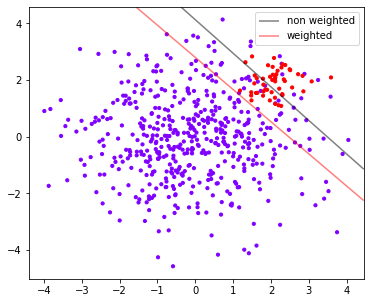

In [6]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow",s=10)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z_clf = clf.decision_function(xy).reshape(XX.shape)

a = ax.contour(XX, YY, Z_clf, colors="black", levels=[0], alpha=0.5,linestyles=['-'])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)

b = ax.contour(XX, YY, Z_wclf, colors="red", levels=[0], alpha=0.5, linestyles=['-'])

# 画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

In [7]:
xx

array([-4.39560798, -4.09054613, -3.78548428, -3.48042243, -3.17536058,
       -2.87029872, -2.56523687, -2.26017502, -1.95511317, -1.65005132,
       -1.34498947, -1.03992762, -0.73486577, -0.42980392, -0.12474206,
        0.18031979,  0.48538164,  0.79044349,  1.09550534,  1.40056719,
        1.70562904,  2.01069089,  2.31575274,  2.62081459,  2.92587645,
        3.2309383 ,  3.53600015,  3.841062  ,  4.14612385,  4.4511857 ])

In [10]:
# 精确率
(y[y == clf.predict(X)] == 1).sum() / (clf.predict(X) == 1).sum()

0.7142857142857143

In [13]:
(y[y == wclf.predict(X)] == 1).sum() / (wclf.predict(X) == 1).sum()

0.5102040816326531

In [14]:
# 准确率
(y == clf.predict(X)).sum()/len(y)

0.9418181818181818

In [16]:
clf.score(X, y)

0.9418181818181818

In [18]:
# 召回率
(y[y == clf.predict(X)] == 1).sum() / (y == 1).sum()

0.6

In [19]:
# 召回率
(y[y == wclf.predict(X)] == 1).sum() / (y == 1).sum()

1.0

In [20]:
# 特异度
(y[y == clf.predict(X)] == 0).sum() / (y == 0).sum()

0.976

In [21]:
# 特异度
(y[y == wclf.predict(X)] == 0).sum() / (y == 0).sum()

0.904

### SVC使用概率

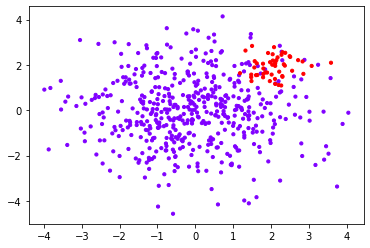

In [22]:
class_1 = 500
class_2 = 50
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[class_1, class_2]
                  ,centers=centers
                  ,cluster_std = clusters_std
                  ,random_state=0
                  ,shuffle=False
                 )
plt.scatter(X[:, 0],X[:,1],c=y,cmap="rainbow",s=10)

### sklearn中的ROC曲线即AUC值

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
FPR, recall, thresholds = roc_curve(y, clf.decision_function(X), pos_label=1)

In [27]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [28]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [29]:
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [30]:
area = roc_auc_score(y, clf.decision_function(X))

In [31]:
plt

<module 'matplotlib.pyplot' from '/home/shban/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

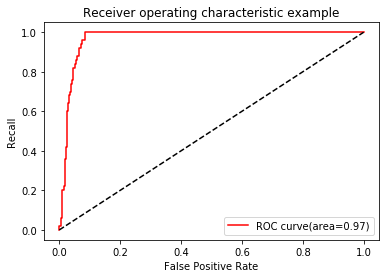

In [32]:
plt.figure()
plt.plot(FPR,recall,color="red"
         ,label="ROC curve(area=%.2f)" % area
        )
plt.plot([0,1],[0,1],color="black",linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("Recall")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [33]:
# 找出最佳阈值
max_index = (recall - FPR).tolist().index(max(recall-FPR))
thresholds[max_index]

-1.0860191749391461

In [34]:
max_index

43

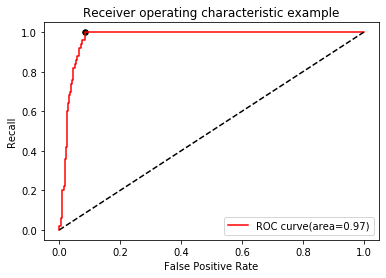

In [35]:
# 在roc曲线中标出最佳阈值的点
plt.figure()
plt.plot(FPR,recall,color="red"
         ,label="ROC curve(area=%.2f)" % area
        )
plt.plot([0,1],[0,1],color="black",linestyle='--')
plt.scatter(FPR[max_index], recall[max_index], color='black',s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("Recall")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()